# DNN Classification

In [8]:
#pip install tensorflow

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [13]:
x=df.drop("Outcome", axis=1)
y=df[["Outcome"]]

In [10]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [12]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [22]:
model=Sequential()
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid")) # evet hayır
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# loss kayıp fonksiyonu, rmse gibi
# optimizer adam, adım seçici
# metrics accuracy
# epoch tekrar sayısı
# batch_size verileri bölerek çalışma
# validation_split validate için veri ayır
# verbose olayı gösterir

In [16]:
model.fit(x,y,epochs=50,batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6648 - loss: 0.6796 - val_accuracy: 0.6429 - val_loss: 0.6801
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6611 - loss: 0.6778 - val_accuracy: 0.6429 - val_loss: 0.6783
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6421 - loss: 0.6779 - val_accuracy: 0.6429 - val_loss: 0.6765
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6262 - loss: 0.6783 - val_accuracy: 0.6429 - val_loss: 0.6749
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6540 - loss: 0.6727 - val_accuracy: 0.6429 - val_loss: 0.6731
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6498 - loss: 0.6715 - val_accuracy: 0.6429 - val_loss: 0.6716
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6522 - loss: 0.6696 - val_accuracy: 0.6429 - val_loss: 0.6703
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6388 - loss: 0.6707 - val_accuracy: 0.6429 - val_loss

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,370 (5.36 KB)

 Trainable params: 456 (1.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 914 (3.57 KB)

In [21]:
from sklearn.preprocessing import normalize, scale

x = scale(x)

In [25]:
history = model.fit(x,y,epochs=100,batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9919 - loss: 0.0423 - val_accuracy: 0.7403 - val_loss: 1.3114
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9926 - loss: 0.0394 - val_accuracy: 0.7532 - val_loss: 1.3055
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9980 - loss: 0.0253 - val_accuracy: 0.7403 - val_loss: 1.3200
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0228 - val_accuracy: 0.7468 - val_loss: 1.3392
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.7338 - val_loss: 1.4152
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9997 - loss: 0.0235 - val_accuracy: 0.7468 - val_loss: 1.4823
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9960 - loss: 0.0207 - val_accuracy: 0.7403 - val_loss: 1.4420
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.7338 -

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,085 (39.40 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,724 (26.27 KB)

In [26]:
import matplotlib.pyplot as plt

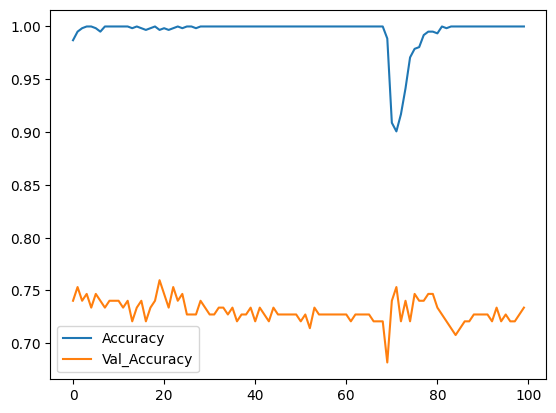

In [30]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend();

# DNN - Regression

In [31]:
import pandas as pd

In [33]:
df=pd.read_pickle("kc_house.pkl")

In [34]:
x=df.drop("price", axis=1)
y=df[["price"]]

In [ ]:
x=scale(x)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
model=Sequential()
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) # son activation gitti
model.compile(loss="mse", optimizer="adam") # loss mse oldu, metrics sildik

In [37]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=128, epochs=5)

Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 270677819392.0000 - val_loss: 227025567744.0000
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 155463139328.0000 - val_loss: 33900548096.0000
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32764053504.0000 - val_loss: 33587419136.0000
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33806006272.0000 - val_loss: 33292881920.0000
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 33282527232.0000 - val_loss: 32966936576.0000


In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,101 (94.15 KB)

 Trainable params: 8,033 (31.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,068 (62.77 KB)

In [39]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
r2_score(y_test,tahmin)

0.35599762201309204

In [42]:
mean_squared_error(y_test,tahmin)**0.5

181567.9851865603

In [43]:
loss_df=pd.DataFrame(history.history)

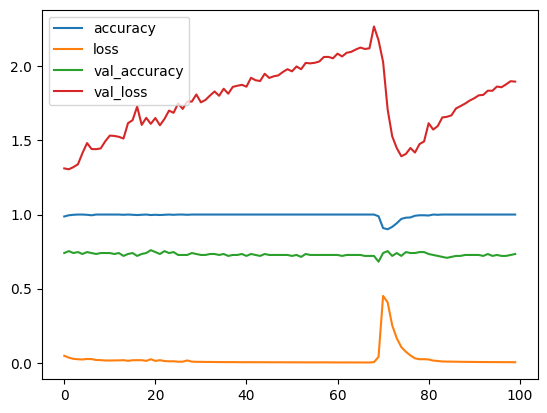

In [47]:
loss_df.plot();